**IMPORT LIBRARIES**

In [2]:
# Step 1: Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report)




**LOAD DATASET**

In [3]:
df = pd.read_csv("waste_type_identifier.csv")

In [4]:
print(df.head())
print(df.tail())

   Moisture%  Texture_Score  Weight(g)  C:N_Ratio Waste_Type
0         63              8        375         83      Other
1         53              8        101         22     Leaves
2          6              6         32         73      Paper
3         54              7         70         26     Leaves
4         15              6         12         53      Paper
     Moisture%  Texture_Score  Weight(g)  C:N_Ratio Waste_Type
995         28              6         85         25     Leaves
996         28              6         85         25     Leaves
997          9              9         16         49      Paper
998         28              6         85         25     Leaves
999         57              5        585         18       Food


**DATA PREPROCESSING**

Finding the missing values


In [5]:
print("\nMissing values in each column:\n")
print(df.isnull().sum())


Missing values in each column:

Moisture%        0
Texture_Score    0
Weight(g)        0
C:N_Ratio        0
Waste_Type       0
dtype: int64


VALUE COUNT

In [6]:
print("\nUnique target classes (Waste_Type):")
print(df["Waste_Type"].value_counts())


Unique target classes (Waste_Type):
Waste_Type
Leaves    276
Paper     253
Food      250
Other     221
Name: count, dtype: int64


In [7]:
print("\nClass distribution (%):")
print(df["Waste_Type"].value_counts(normalize=True) * 100)


Class distribution (%):
Waste_Type
Leaves    27.6
Paper     25.3
Food      25.0
Other     22.1
Name: proportion, dtype: float64


Outlier Detection 

In [8]:
num_cols = ['Moisture%', 'Texture_Score', 'Weight(g)', 'C:N_Ratio']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

**Exploratory Data Analysis (EDA with visualizations)**

Dataset Summary

In [9]:
print("Shape of Dataset :", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:")
df.info()
print("\nData types\n",df.dtypes)
print("\nSummary Statistics:")
df.describe()



Shape of Dataset : (1000, 5)

Columns:
 Index(['Moisture%', 'Texture_Score', 'Weight(g)', 'C:N_Ratio', 'Waste_Type'], dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Moisture%      1000 non-null   int64 
 1   Texture_Score  1000 non-null   int64 
 2   Weight(g)      1000 non-null   int64 
 3   C:N_Ratio      1000 non-null   int64 
 4   Waste_Type     1000 non-null   object
dtypes: int64(4), object(1)
memory usage: 39.2+ KB

Data types
 Moisture%         int64
Texture_Score     int64
Weight(g)         int64
C:N_Ratio         int64
Waste_Type       object
dtype: object

Summary Statistics:


,Moisture%,Texture_Score,Weight(g),C:N_Ratio
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,42.241000,5.883000,189.605000,44.375000
std,24.914206,2.132102,169.349367,30.044484
min,6.000000,1.000000,9.000000,10.000000
25%,18.000000,4.000000,41.000000,18.000000
50%,40.000000,6.000000,150.000000,35.000000
75%,63.000000,7.000000,299.000000,69.250000
max,90.000000,10.000000,589.000000,113.000000


**VISULATIZATION**

CLASS DISTRIBUTAION

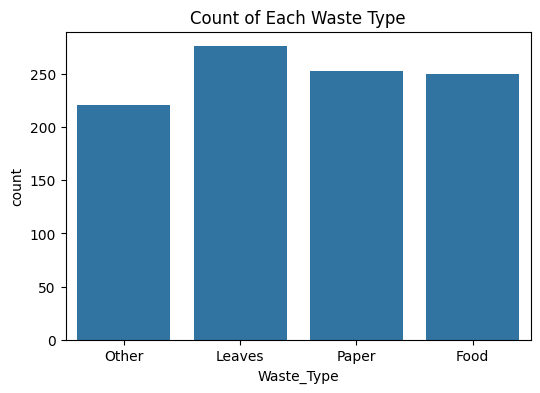

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="Waste_Type", data=df)
plt.title("Count of Each Waste Type")
plt.show()

Histograms of numeric features

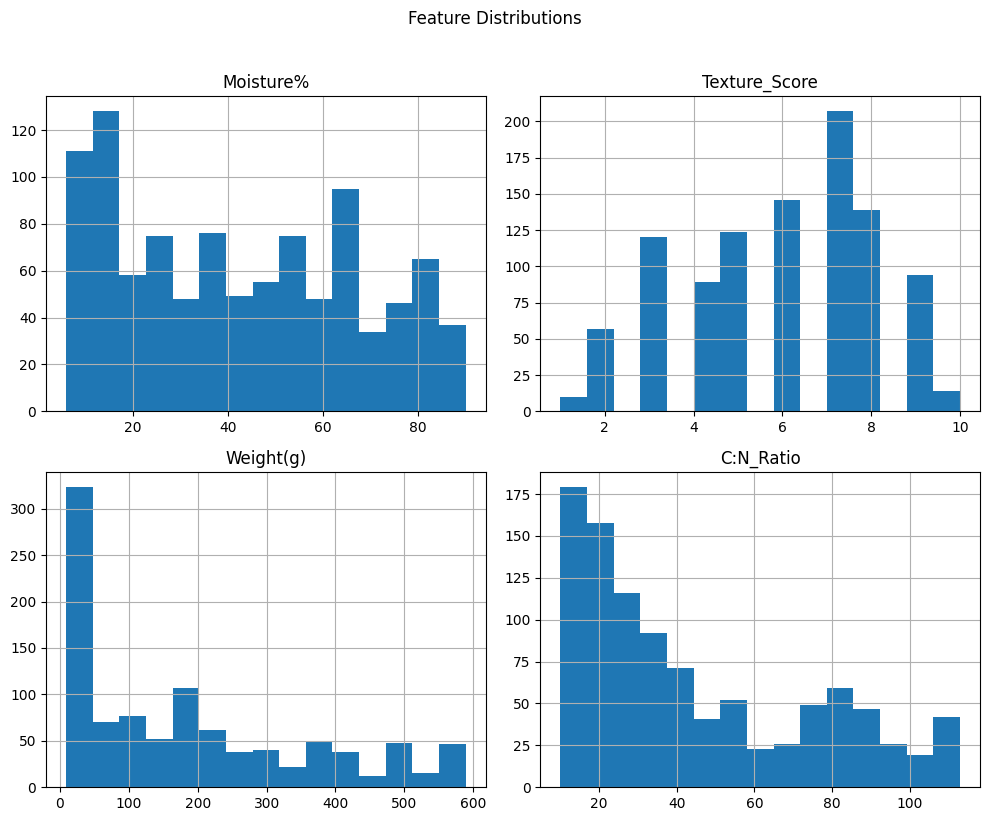

In [11]:
num_cols = ["Moisture%", "Texture_Score", "Weight(g)", "C:N_Ratio"]

df[num_cols].hist(figsize=(10,8), bins=15)
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

CORRELATION HEATMAP

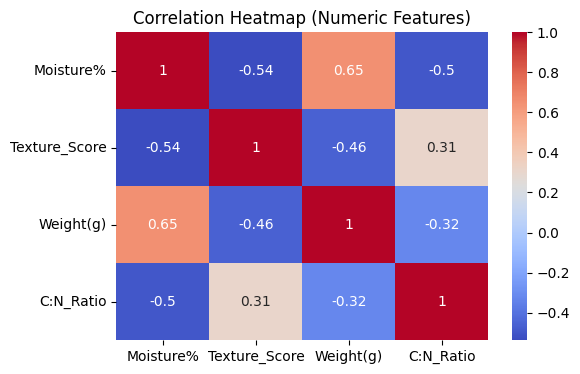

In [12]:
plt.figure(figsize=(6,4))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

Boxplots to Detect Outliers

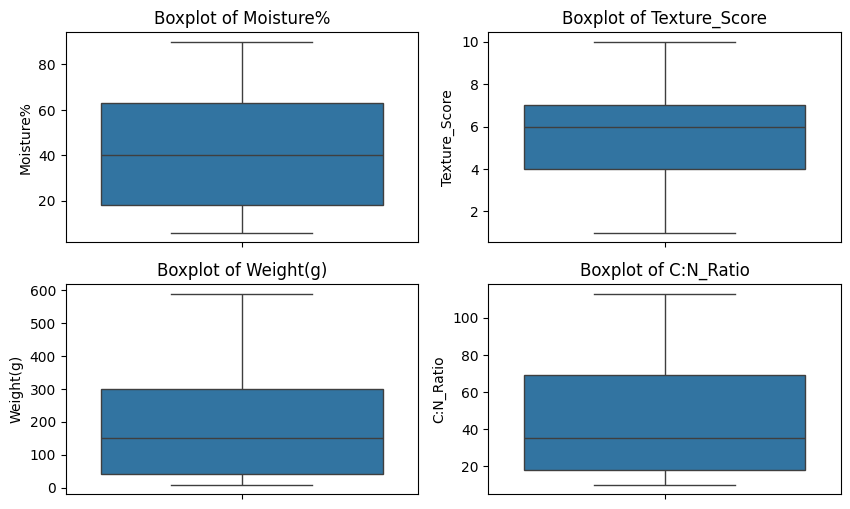

In [13]:
plt.figure(figsize=(10,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.show()

Relationship Between Numerical Features & Waste Type

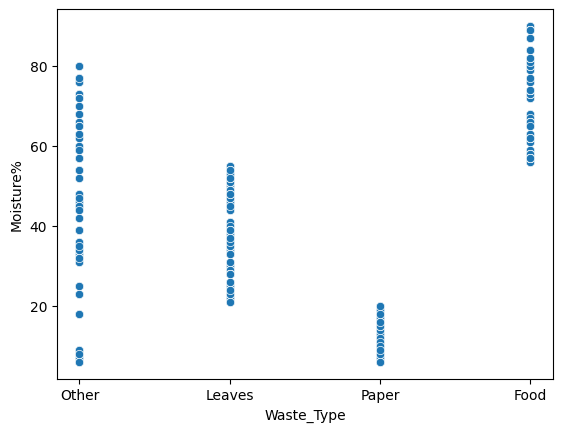

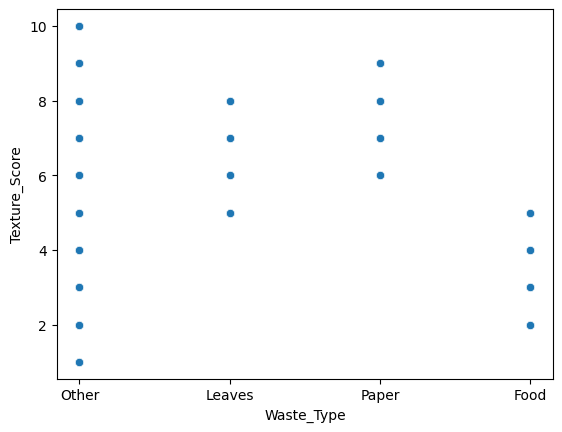

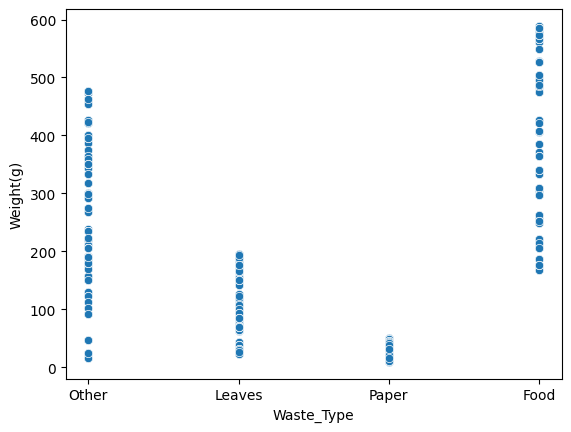

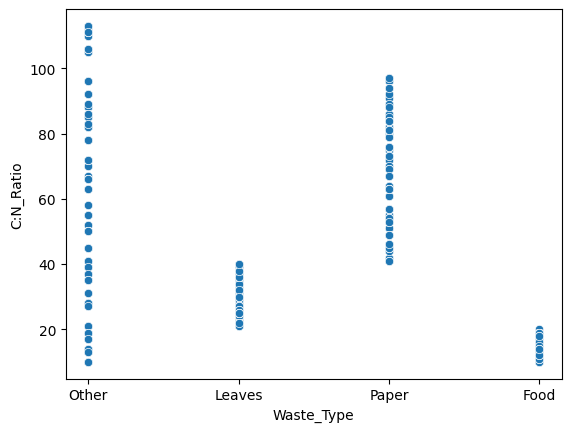

In [14]:
sns.scatterplot(x='Waste_Type', y='Moisture%', data=df)
plt.show()

sns.scatterplot(x='Waste_Type', y='Texture_Score', data=df)
plt.show()

sns.scatterplot(x='Waste_Type', y='Weight(g)', data=df)
plt.show()

sns.scatterplot(x='Waste_Type', y='C:N_Ratio', data=df)
plt.show()

**MODEL BUILDING**

In [15]:
le = LabelEncoder()
df['Waste_Type'] = le.fit_transform(df['Waste_Type'])

X = df.drop("Waste_Type", axis=1)
y = df["Waste_Type"]

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


In [17]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True)
}

results = []


In [18]:
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')

    results.append([name, accuracy, precision, recall, f1])

comparison = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(comparison)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.970000   0.969138  0.967162  0.967612
1          Naive Bayes  0.986667   0.988295  0.984375  0.986013
2                  SVM  0.983333   0.983108  0.980469  0.981237


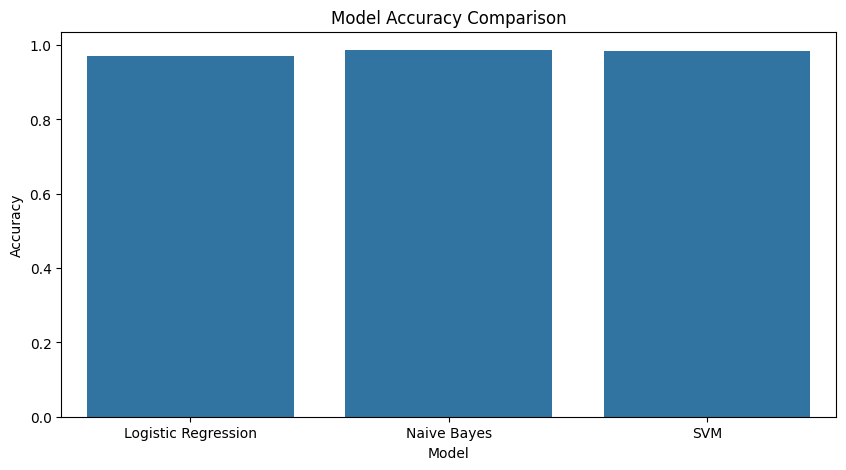

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data=comparison, x="Model", y="Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [20]:
best_model_name = comparison.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

print("\nBest Model:", best_model_name)



Best Model: Naive Bayes


In [22]:
import joblib
joblib.dump(best_model, "waste_best_model.joblib")
joblib.dump(scaler, "waste_scaler.joblib")
joblib.dump(le, "waste_label_encoder.joblib")
joblib.dump(list(X.columns), "waste_features.joblib")

print("Model files saved successfully!")


Model files saved successfully!
